#  Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#открываю, изучаю  датасет
import pandas as pd
import seaborn
import matplotlib.pyplot as plt




In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />стоит делить блок загрузки библиотек и код загрузки датасета, в случае необходимости добавления новых библиотек не придется загружать весь датасет заново и перезапускать проект целиком

In [3]:
#еще немного
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

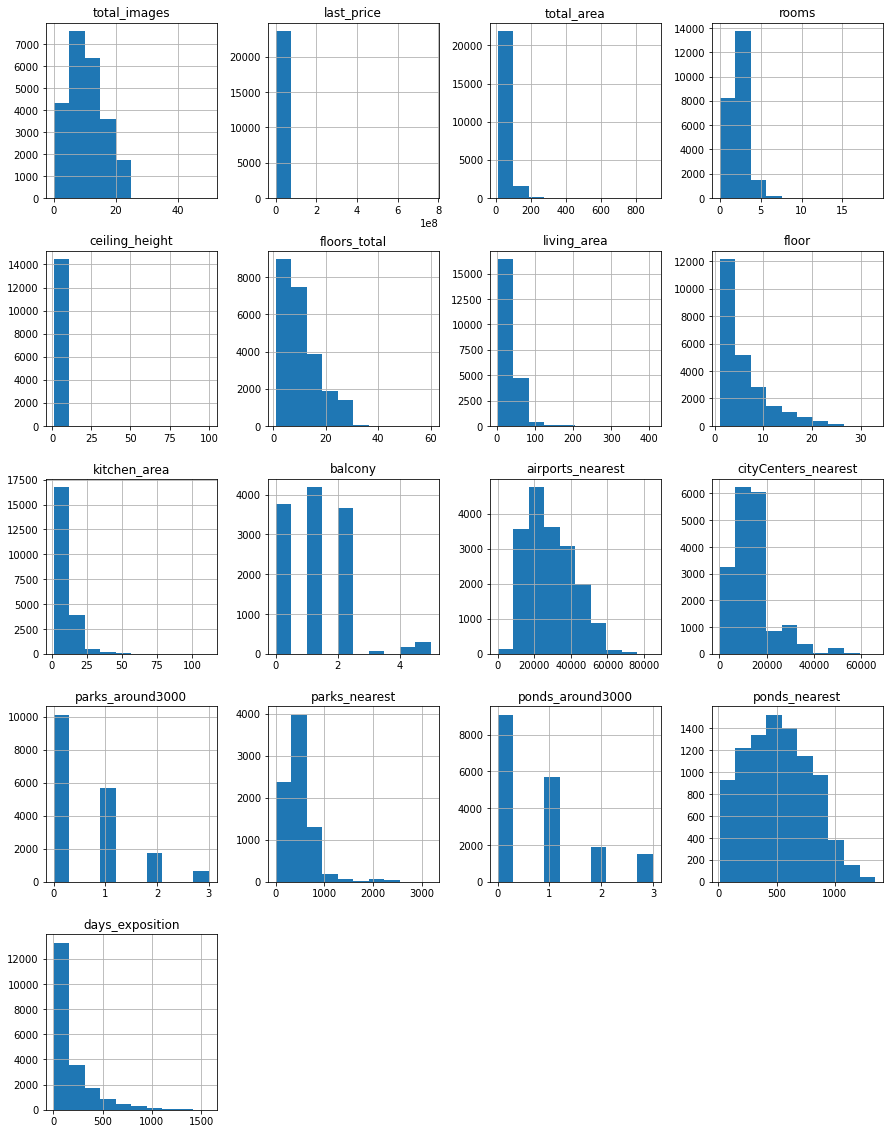

In [4]:
#строю гистограмму по всем столбцам

data.hist(figsize = (15,20))
        

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Убрать служ. информацию поможет точка с запятой на посл. строке кода

    array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

data.hist(figsize=(15, 20));


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> обзор данных проведен корректно

## 2. Предобработка данных

In [5]:
#вывожу количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

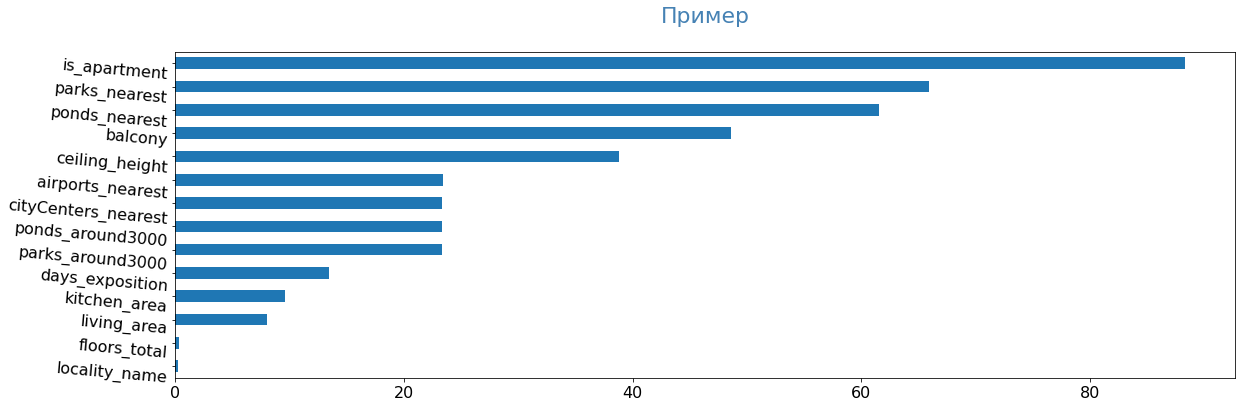

In [7]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
  

In [8]:
#посмотрю уникальные значения в столбе с балконами
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [9]:
#заменю nan-ы
data['balcony'] = data['balcony'].fillna(0)

In [10]:
#успешно
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [11]:
#проделаю тоже самое с высотой потолков, только заменю nan на среднее
ceil = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(ceil)
data['ceiling_height'].unique()


array([  2.7      ,   2.7714989,   3.03     ,   2.5      ,   2.67     ,
         2.56     ,   3.05     ,   2.75     ,   2.6      ,   2.9      ,
         2.8      ,   2.55     ,   3.       ,   2.65     ,   3.2      ,
         2.61     ,   3.25     ,   3.45     ,   2.77     ,   2.85     ,
         2.64     ,   2.57     ,   4.15     ,   3.5      ,   3.3      ,
         2.71     ,   4.       ,   2.47     ,   2.73     ,   2.84     ,
         3.1      ,   2.34     ,   3.4      ,   3.06     ,   2.72     ,
         2.54     ,   2.51     ,   2.78     ,   2.76     ,  25.       ,
         2.58     ,   3.7      ,   2.52     ,   5.2      ,   2.87     ,
         2.66     ,   2.59     ,   2.       ,   2.45     ,   3.6      ,
         2.92     ,   3.11     ,   3.13     ,   3.8      ,   3.15     ,
         3.55     ,   3.16     ,   3.62     ,   3.12     ,   2.53     ,
         2.74     ,   2.96     ,   2.46     ,   5.3      ,   5.       ,
         2.79     ,   2.95     ,   4.06     ,   2.94     ,   3.8

In [12]:
#проверяю. пока думаю, что больше нечего логично заменить для анализа
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причины пропусков могут быть разные. 1. Человесческий фактор. Если рассматривать среднестатистического пользователя, то я думаю, что в большинстве случаев - это лень. Скорее всего, продавец или арендодатель не считает информацию такой важной и экономит свое время, чтобы не вводить данные. 2. Технологический. Ошибка чтения

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [14]:
#заменю тип данных балконов
data['balcony'] = data['balcony'].astype(int)


In [15]:
#заменю тип данных дней
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype(int)


In [16]:
#переведу дату сразу в более подходящий  формат

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')


Менять типы данных необходимо для того, чтобы корректно выполннить анализ, иногда для удобства в принципе. Например, площадь квартиры в десятичных дробях - хорошо, количество комнат в десятичных дробях - никому не нужно.

In [17]:
#изучаю неявные дубликаты в столбце с названиями
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#применяю метод для замены 

data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Я не стала менять "поселок городского типа" и "городской поселок", так как не уверена, что это одно и тоже. 

In [19]:
# check
data['locality_name'].nunique()

330

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

In [20]:
#устраняю аномалии в высоте потолков
data.loc[(data['ceiling_height'] >=10), 'ceiling_height'] = data.loc[(data['ceiling_height'] >=10), 'ceiling_height'] / 10
data['ceiling_height'].unique()

array([ 2.7      ,  2.7714989,  3.03     ,  2.5      ,  2.67     ,
        2.56     ,  3.05     ,  2.75     ,  2.6      ,  2.9      ,
        2.8      ,  2.55     ,  3.       ,  2.65     ,  3.2      ,
        2.61     ,  3.25     ,  3.45     ,  2.77     ,  2.85     ,
        2.64     ,  2.57     ,  4.15     ,  3.5      ,  3.3      ,
        2.71     ,  4.       ,  2.47     ,  2.73     ,  2.84     ,
        3.1      ,  2.34     ,  3.4      ,  3.06     ,  2.72     ,
        2.54     ,  2.51     ,  2.78     ,  2.76     ,  2.58     ,
        3.7      ,  2.52     ,  5.2      ,  2.87     ,  2.66     ,
        2.59     ,  2.       ,  2.45     ,  3.6      ,  2.92     ,
        3.11     ,  3.13     ,  3.8      ,  3.15     ,  3.55     ,
        3.16     ,  3.62     ,  3.12     ,  2.53     ,  2.74     ,
        2.96     ,  2.46     ,  5.3      ,  5.       ,  2.79     ,
        2.95     ,  4.06     ,  2.94     ,  3.82     ,  3.54     ,
        3.53     ,  2.83     ,  4.7      ,  2.4      ,  3.38  

Остались потолки с высотой, например, 1 м или сразу 10. Их не так много, удалять не стала.
Также обнаружены аномалии в колонке с количеством дней публикации. Смею предположить, что это случилось из-за замены nan на нули. В последующем анализе буду об этом помнить.

In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [22]:
#меняю тип данных в "этажах"
data['floors_total'] = data['floors_total'].fillna(0).astype(int)

In [23]:
data['floors_total'].dropna()

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
стоит сменить тип данных в 
        
         
         6   floors_total                     23613 non-null  float64       
        
пропуски можно удалить, кол-во их минимально
         

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__проверим какие аномалии остались__ таблица ниже

In [24]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","21,796.00","21,421.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,0.00
max,19.00,900.00,10.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [25]:
#заполняю пропуски в апартаментах
data['is_apartment'] = data['is_apartment'].fillna('False')

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
        
        'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
        
стоит учесть наличие пропусков при фильтрации данных

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для выполнения пункта 2.4. существует два подхода
        
Можно механически бороться с выбросами, ...
               
основная проблема такого подхода — не учитывается неоднородность нашей выборки: у нас здесь и малые поселки, и вторая столица страны, и исторический фонд и массовая застройка, и однушки и довольно большое кол-во многокомнатных квартир, или наоборот одна две квартиры с количеством комнат больше 7-ми ...
        

        
если бы у нас в таблице были бы только однокомнатные квартиры из определенного района массовой застройки, тогда да, мы бы боролись с выбросами традиционными способами, при нашем многообразии населенных пунктов, многокомнатности такие подходы не работают... т.е. они работают, но это усложнит наш проект — придется разбить и объединить записи нашей таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем только выполнять все остальные пункты на каждой отдельной выборке
        
Остается другой подход — убираем редкие значения и следим за количеством потерь... 
         
Для выборки из 23-х тысяч значений, несколько записей со стоимостью квадратного метра выше 1-го млн. руб., довольно редкое явление

Хороший пример, высота потолков, которую мы отрезаем по нижней и верхней планке, это скорее аномальные записи, посмотрим на другой аспект — на редкости: кол-во комнат

__т.е. мы не говорим о том, что квартир с кол-ом комнат выше 7 не бывает, мы говорим, что для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу ...__
        
подобным образом рассматриваем и остальные параметры
        
наши помощники
        
1. гистограммы, с хорошим масштабом
2. метод describe() или облегченная версия, пример выше
3. метод value_counts()
        
плюс жизненный опыт 

In [26]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [27]:
#посчитаю количество квартир, где комнат больше 10

data.query('rooms > 10')['rooms'].count()

8

In [28]:
#удаляю
data.drop(index=data.query('rooms > 10').index,inplace=True)


<AxesSubplot:>

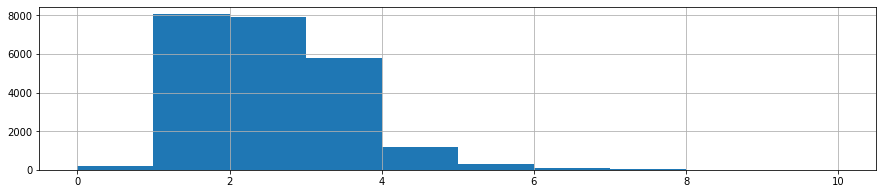

In [29]:
#строю графики 
data.rooms.hist(bins = 10, figsize = (15,3))

AxesSubplot(0.125,0.125;0.775x0.755)


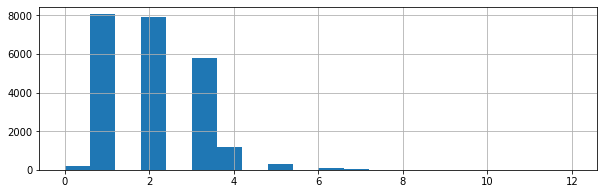

In [30]:
print(data.rooms.hist(bins = 20, figsize = (10,3), range = (0,12)));


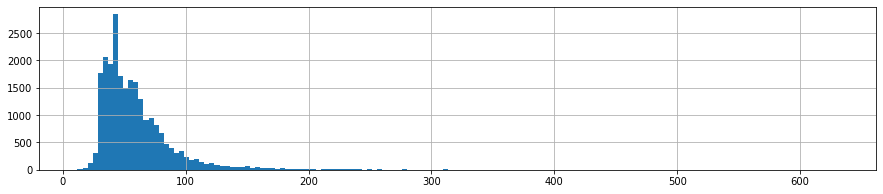

In [31]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

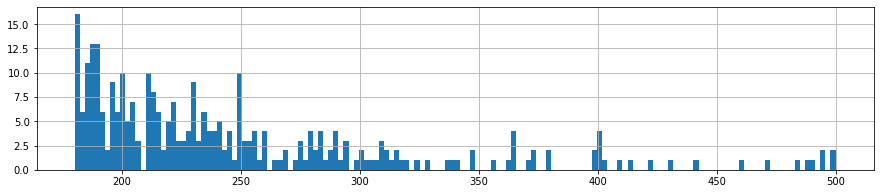

In [32]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

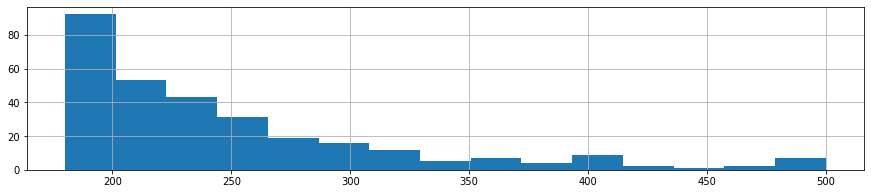

In [33]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

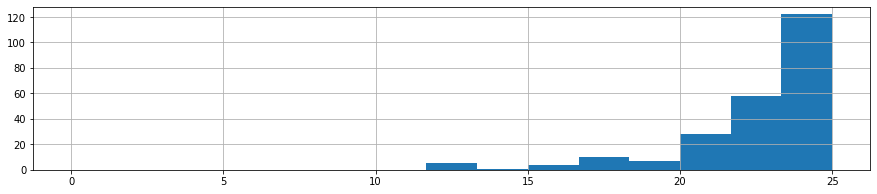

In [34]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [35]:
#data.ceiling_height.value_counts().to_frame()

In [36]:
#разбираюсь с потолками
print(data.query('ceiling_height < 2')['ceiling_height'].count())
data.query('ceiling_height > 5')['ceiling_height'].count()

5


12

In [37]:
#удаляю
data.drop(index=data.query('ceiling_height <= 2').index,inplace=True)
data.drop(index=data.query('ceiling_height >= 5.0').index,inplace=True)

In [38]:
#проверяю
data['ceiling_height'].unique()

array([2.7      , 2.7714989, 3.03     , 2.5      , 2.67     , 2.56     ,
       3.05     , 2.75     , 2.6      , 2.9      , 2.8      , 2.55     ,
       3.       , 2.65     , 3.2      , 2.61     , 3.25     , 3.45     ,
       2.77     , 2.85     , 2.64     , 2.57     , 4.15     , 3.5      ,
       3.3      , 2.71     , 4.       , 2.47     , 2.73     , 2.84     ,
       3.1      , 2.34     , 3.4      , 3.06     , 2.72     , 2.54     ,
       2.51     , 2.78     , 2.76     , 2.58     , 3.7      , 2.52     ,
       2.87     , 2.66     , 2.59     , 2.45     , 3.6      , 2.92     ,
       3.11     , 3.13     , 3.8      , 3.15     , 3.55     , 3.62     ,
       3.12     , 2.53     , 2.74     , 2.96     , 2.46     , 2.79     ,
       2.95     , 4.06     , 2.94     , 3.82     , 3.54     , 3.53     ,
       2.83     , 4.7      , 2.4      , 3.38     , 3.01     , 3.65     ,
       3.9      , 3.18     , 3.35     , 2.3      , 3.57     , 2.48     ,
       2.62     , 2.82     , 3.98     , 2.63     , 

In [39]:
print(data.query('ceiling_height < 1.5')['ceiling_height'].count())
data.query('ceiling_height > 5')['ceiling_height'].count()

0


0

<AxesSubplot:>

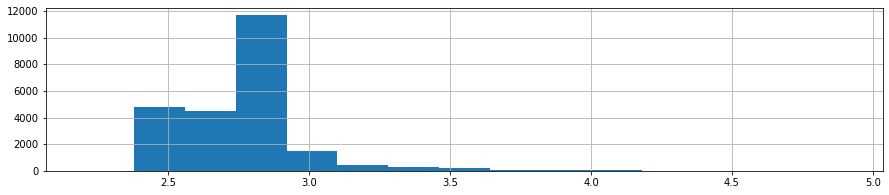

In [40]:
data.ceiling_height.hist(bins = 15, figsize = (15,3))

<AxesSubplot:>

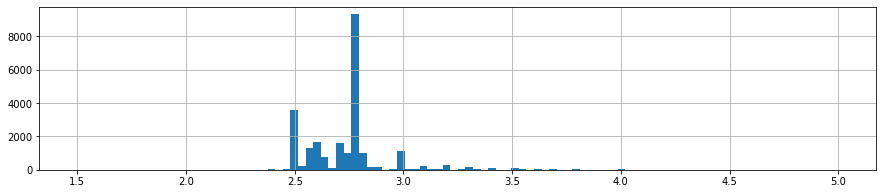

In [41]:
data.ceiling_height.hist(bins = 100, figsize = (15,3), range = (1.5,5))

In [42]:
#площадь квартиры
#data.total_area.value_counts().to_frame()

In [43]:
print(data.query('total_area <= 10.0')['total_area'].count())
data.query('total_area > 300')['total_area'].count()

0


55

In [44]:
data.drop(index=data.query('total_area > 300').index,inplace=True)

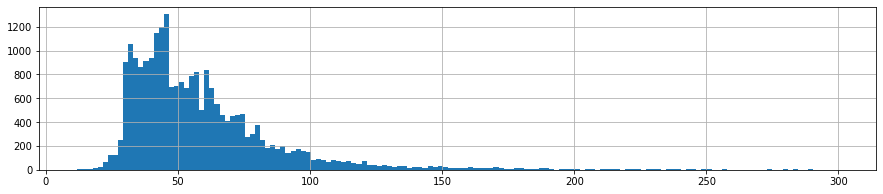

In [45]:
data.total_area.hist(bins = 150, figsize = (15,3));

In [46]:
#дни размещения
print(data.days_exposition.min())
print(data.days_exposition.max())
print(data.query('days_exposition == 0')['days_exposition'].count())
print(data.query('days_exposition <= 7 and days_exposition != 0')['days_exposition'].count())
print(data.query('days_exposition >= 730')['days_exposition'].count())

0
1580
3162
845
745


### check nan

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23606 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23606 non-null  int64         
 1   last_price            23606 non-null  float64       
 2   total_area            23606 non-null  float64       
 3   first_day_exposition  23606 non-null  datetime64[ns]
 4   rooms                 23606 non-null  int64         
 5   ceiling_height        23606 non-null  float64       
 6   floors_total          23606 non-null  int64         
 7   living_area           21720 non-null  float64       
 8   floor                 23606 non-null  int64         
 9   is_apartment          23606 non-null  object        
 10  studio                23606 non-null  bool          
 11  open_plan             23606 non-null  bool          
 12  kitchen_area          21348 non-null  float64       
 13  balcony         

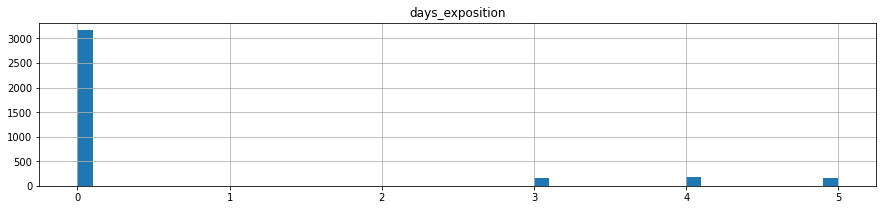

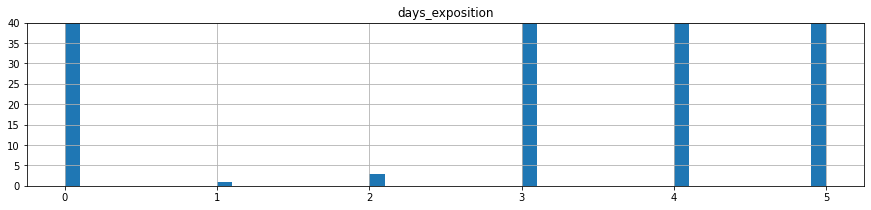

In [48]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />У нас редкие значения в колонке 
        
        'days_exposition'
        
заканчиваются на двойке, стоит использовать гистограммы для корректной фильтрации значений
        

In [49]:
 
#количество дней 730(более 2х лет)
data.drop(index=data.query('days_exposition <= 7').index,inplace=True)
#думаю, что за 7 дней вполне реально продать недвижимость - оставляю?
data.drop(index=data.query('days_exposition >= 730').index,inplace=True)

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Кодом мы удаляем 3000 записей, которые заполнили нулями
        
        data.drop(index=data.query('days_exposition <= 7').index,inplace=True
            
Пропуски в ['days_exposition'] говорят нам, что квартиры еще не проданы..., неверно терять подобные записи

<AxesSubplot:>

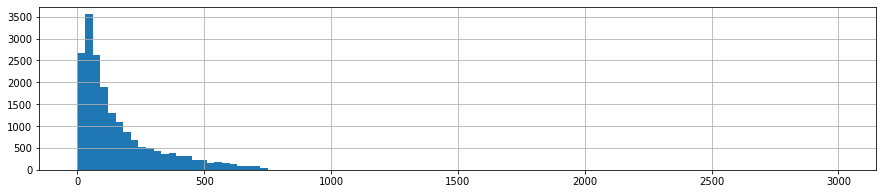

In [50]:
data.days_exposition.hist(bins = 100, figsize = (15,3), range = (0,3000))

In [51]:
#Цена за объект
print(data.last_price.min())
print(data.last_price.max())
print(data.query('last_price <= 500000')['last_price'].count())
print(data.query('last_price >= 50000000')['last_price'].count())


12190.0
330000000.0
16
71


In [52]:
data.drop(index=data.query('last_price <= 500000').index,inplace=True)
data.drop(index=data.query('last_price >= 50000000').index,inplace=True)

In [53]:
print(data.last_price.min())
print(data.last_price.max())
print(data.query('last_price <= 500000')['last_price'].count())
print(data.query('last_price >= 50000000')['last_price'].count())

520000.0
49900000.0
0
0


<AxesSubplot:>

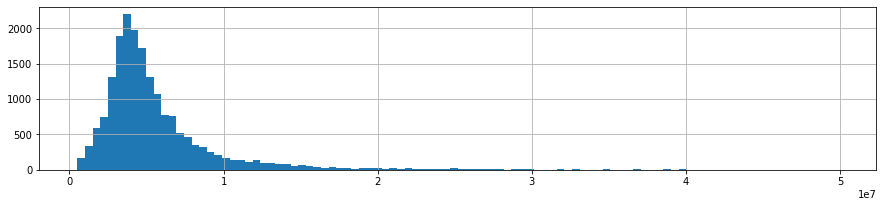

In [54]:
data.last_price.hist(bins = 100, figsize = (15,3))

<AxesSubplot:>

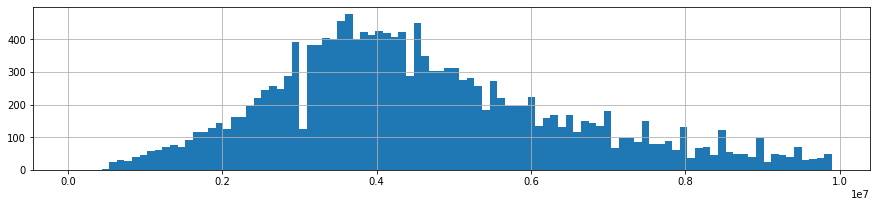

In [55]:
data.last_price.hist(bins = 100, figsize = (15,3), range = (43000,9900000))

In [56]:
#жилая площадь
print(data.living_area.min())
print(data.living_area.max())
print(data.query('living_area <= 10')['living_area'].count())
print(data.query('living_area >= 200')['living_area'].count())
#living_area

2.0
211.0
50
2


In [57]:

data.drop(index=data.query('living_area <= 10').index,inplace=True)

<AxesSubplot:>

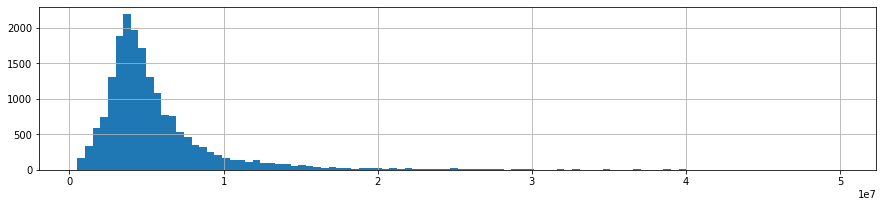

In [58]:
data.last_price.hist(bins = 100, figsize = (15,3))

In [59]:
#площадь кухни
print(data.kitchen_area.min())
print(data.kitchen_area.max())
print(data.query('kitchen_area <= 4')['living_area'].count())
#кухня более 30 м2 по версии гугла считается уже почти нереальной, не понимаю,
#удалять значения более или нет

#в любом случае строю график, удаляю выбросы в "меньшую" сторону
print(data.query('kitchen_area >= 40')['living_area'].count())
#kitchen_area

2.0
100.7
47
68


In [60]:
data.drop(index=data.query('kitchen_area <= 4').index,inplace=True)

<AxesSubplot:>

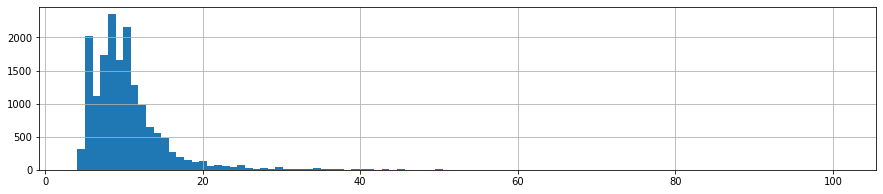

In [61]:
data.kitchen_area.hist(bins = 100, figsize = (15,3))

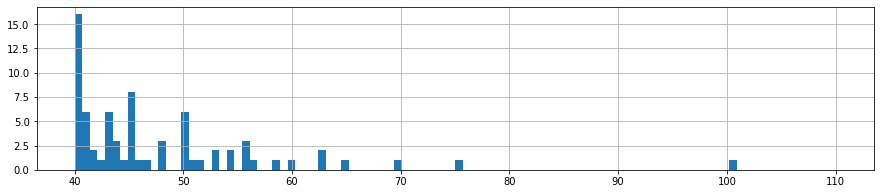

In [62]:
data.kitchen_area.hist(bins = 100, figsize = (15,3), range = (40,110));

In [63]:
print(data.floor.min())
print(data.floor.max())

#floor

1
32


<AxesSubplot:>

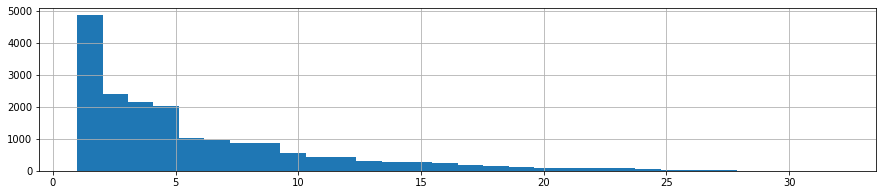

In [64]:
data.floor.hist(bins = 30, figsize = (15,3))

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Осталось выполнить пункт 2.4 из брифа проекта

2.4.	Найдите и устраните редкие и выбивающиеся значения.
        
__Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%__

In [65]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.57,2.40,8.00,"608,032.00",11.00,4.80,1.00,0.00
0.01,1.00,25.39,2.50,9.00,"1,066,800.00",13.37,5.00,1.00,2.00
0.5,2.00,50.62,2.77,96.00,"4,500,000.00",30.00,9.00,4.00,9.00
0.99,5.00,165.00,3.50,667.00,"25,045,279.68",99.52,30.20,23.00,26.00
0.9988,7.00,244.60,4.00,722.60,"40,000,000.00",154.85,50.00,26.00,28.60


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />Квантили что это такое
        
https://fin-accounting.ru/cfa/l1/quantitative/cfa-quartiles-quintiles-deciles-percentiles?ysclid=l7gy2kky4i156375632
        
они помогают увидеть редкости и аномалии в данных

In [66]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"18,669.00","18,669.00","18,669.00","18,669.00","18,669.00","17,086.00","16,761.00","18,669.00","18,669.00"
min,0.00,13.00,2.20,8.00,"520,000.00",10.08,4.10,1.00,0.00
max,10.00,297.50,4.80,729.00,"49,900,000.00",211.00,100.70,32.00,60.00


<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Выполнен достойный объем работы
        
остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
        
        'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'living_area',  'kitchen_area', 'floors_total'
        
стоит учесть наличие пропусков или нулевые заглушки при фильтрации данных
        
например в скорости продаж левый хвост (или редкости в минимальных значениях) состоит из значений в 1 и 2 дня 

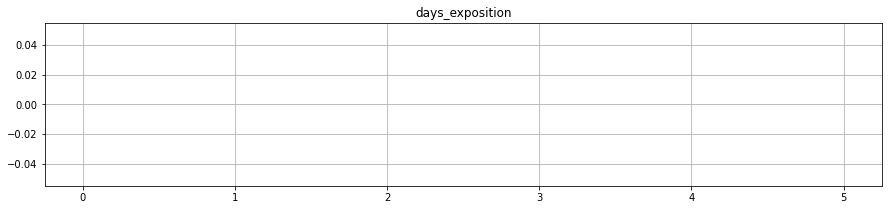

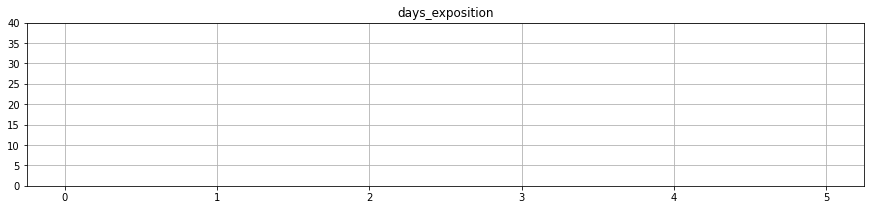

In [67]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

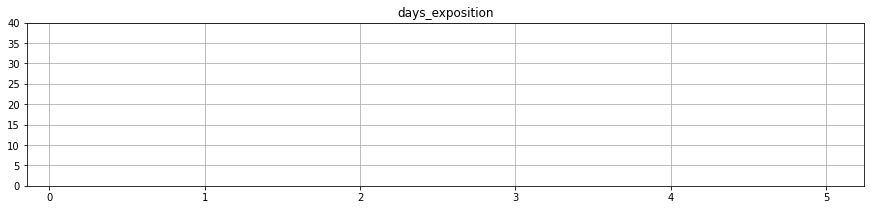

In [68]:
# check
data.hist(column = 'days_exposition', bins = 40, figsize = (15,3), range = (0.1,5))
plt.ylim(0, 40);

## 3.Посчитайте и добавьте в таблицу новые столбцы

In [69]:
#добавляю столбец с ценой одного квадратного метра
data['price_m'] = data['last_price'] / data['total_area']
data['price_m'] = data['price_m'].astype(int)


In [70]:
#добавляю день недели публикации объявления, месяц и год


data['day'] = data['first_day_exposition'].dt.weekday
data['day'].head(4)

1    1
2    3
4    1
5    0
Name: day, dtype: int64

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит поменять кодировку при создании колонки на день недели (у нас день месяца)
        
        data['day'] = data['first_day_exposition'].dt.day
        
Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

+ день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [71]:
data['month'] = data['first_day_exposition'].dt.month


In [72]:
data['year'] = data['first_day_exposition'].dt.year


In [73]:
#для типа этажа создаю цикл  
def floor_type(type):
  
    if type['floor'] == 1:
        return 'первый'
    if type['floor'] == type['floors_total']:
        return 'последний'
    if type['floor'] >= 2:
        return 'другой'
    if type['floor'] == 0:
        return 'dont_use'
data['floors_type'] = data.apply(floor_type, axis =1)
#если я правильно поняла :)


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Функция хорошая, стоит учесть крайние условия: нулевые и отрицательные значения

In [74]:
#перевожу расстояние из центра города в км
data['city_center_km'] = data['cityCenters_nearest']/1000
data['city_center_km'] = data['city_center_km'].round()
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,floors_type,city_center_km
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11,18.60,1,False,...,NaN,0.0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5,34.30,4,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14,32.00,13,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.771499,12,14.40,5,False,...,NaN,NaN,NaN,55,95065,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.771499,26,10.60,6,False,...,NaN,0.0,NaN,155,99195,3,11,2017,другой,19.0
8,20,2900000.0,33.16,2018-05-23,1,2.771499,27,15.43,26,False,...,NaN,NaN,NaN,189,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,NaN,0.0,NaN,289,88524,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.670000,12,20.30,3,False,...,310.0,2.0,553.0,137,127525,3,11,2017,другой,14.0
12,10,3890000.0,54.00,2016-06-30,2,2.771499,5,30.00,5,False,...,NaN,NaN,NaN,90,72037,3,6,2016,последний,NaN
13,20,3550000.0,42.80,2017-07-01,2,2.560000,5,27.00,5,False,...,294.0,3.0,298.0,366,82943,5,7,2017,последний,33.0


<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />стоит выполнить пункт проекта
        
•	расстояние до центра города в километрах (переведите из м в км и __округлите до целых значений__)
        
        data['city_center_km'].round()
        
код не сохраняет изменений
      

## 4. Проведите исследовательский анализ данных

### 4.1 Изучите параметры объектов:

13.0
297.5


<AxesSubplot:ylabel='Frequency'>

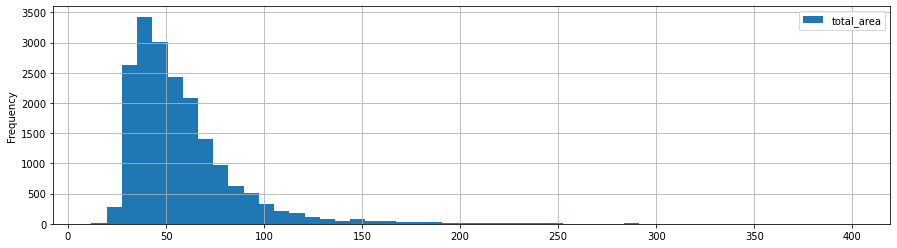

In [75]:
#строю отдельные гитстограммы для кадого из параметров
#общая площадь

print(data['total_area'].min())

print(data['total_area'].max())

data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (12,400))


График выглядит хорошо. Минимальное значение общей площади -13 м2. К сожалению, такое может быть. Максимальное значение - 297,5 м2. К счастью, такое тоже может быть. Распределение нормальное.   

In [76]:
#тип этажа квартиры («первый», «последний», «другой»)
#группирую по типу
inin = data.groupby(by='floors_type')['floors_total'].count()
inin
#inin = data.pivot_table(index=['floors_type'], values=["floors_total"], aggfunc=['count'])
#inin

floors_type
другой       13861
первый        2268
последний     2540
Name: floors_total, dtype: int64

<AxesSubplot:xlabel='floors_type'>

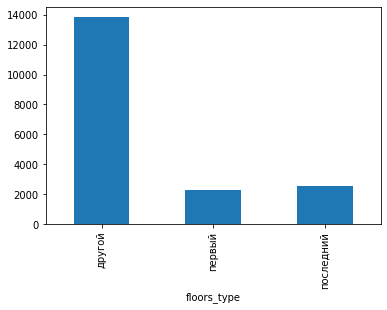

In [77]:
#строю график
data.groupby(by='floors_type')['floors_total'].count().plot(kind='bar')

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Импорт библиотек стоит выносить на первые строки проекта, так коллегам будет удобнее настроить свои рабочие места под наши требования

Что очень логично, больше всего квартир с этажом типа "другой". Почти одинковое количество продают квартиры на первом и последнем этажах.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />На графике мы подсчитали средние значения по каждой категории, а нам требуется подсчитать кол-во по каждой категории
        
        seaborn.barplot(x = data['floors_type'],y= data['floors_total'])

10.08
211.0


<AxesSubplot:ylabel='Frequency'>

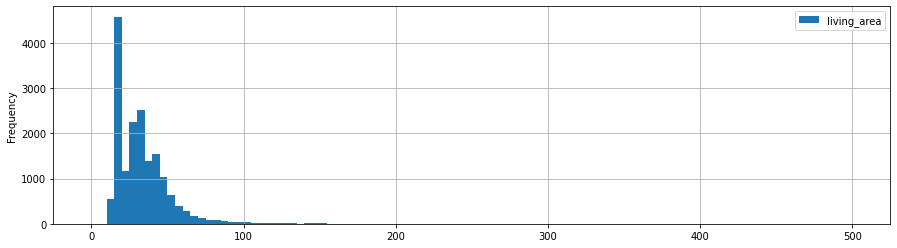

In [78]:
#жилая площадь
print(data['living_area'].min())

print(data['living_area'].max())

data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,500))

<AxesSubplot:ylabel='Frequency'>

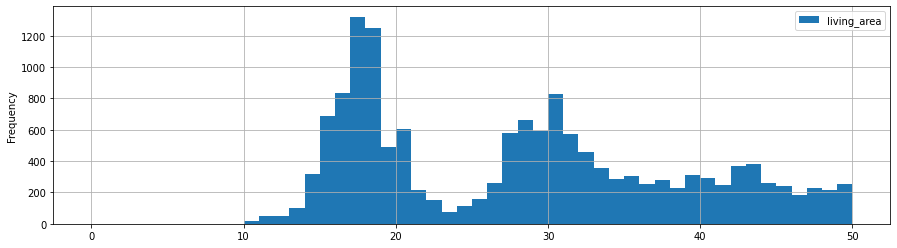

In [79]:
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,50))

<AxesSubplot:ylabel='Frequency'>

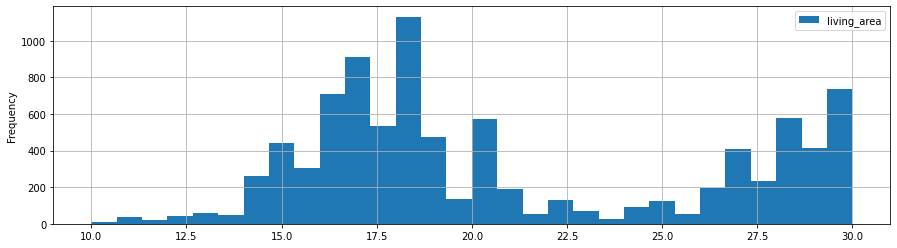

In [80]:
data.plot(y = 'living_area', kind = 'hist', bins = 30, grid=True, figsize = (15,4), range = (10,30))

Минимальное значение - 10,8 м2. Максимальное значение - 211 м2. Распределение нормальное. 

4.1
100.7


<AxesSubplot:ylabel='Frequency'>

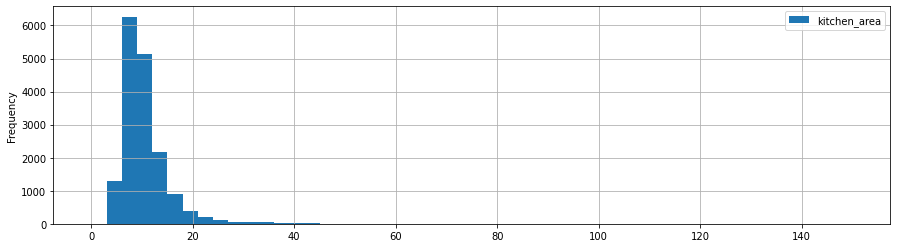

In [81]:
#площадь кухни

print(data['kitchen_area'].min())

print(data['kitchen_area'].max())

data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,150))

Минимальное значение - 4,1 м2. Максимальное значение - 100 м2. Вполне такое может быть. Распределение нормальное. Критических выбросов нет.

520000.0
49900000.0


<AxesSubplot:ylabel='Frequency'>

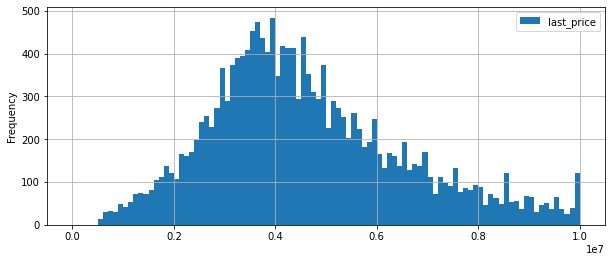

In [82]:
#цена объекта
print(data['last_price'].min())

print(data['last_price'].max())


data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,10000000))

In [83]:
#print(data.query('last_price < 50000').count())
#print(data.query('last_price < 300000').count())



Минимальная стоимость недвижимости - 520000 рублей. Максимальная - 49 000 000 рублей. Выбросов нет, распределение нормальное.

0
10


<AxesSubplot:ylabel='Frequency'>

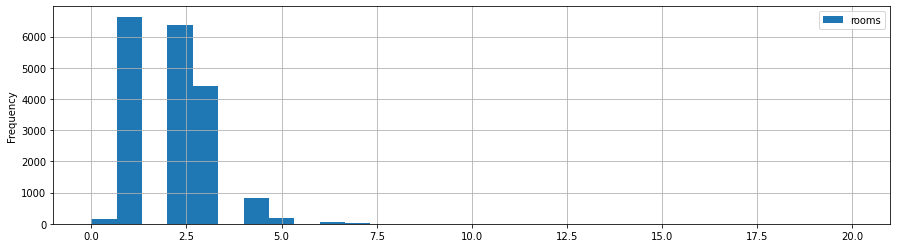

In [84]:
#количество комнат;
print(data['rooms'].min())

print(data['rooms'].max())


data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (15,4), range = (0,20))#количество комнат;


Количество комнат равных нулю - может говорить о продаже, например, студии. Также и 10 комнат - на сайте продаются большие апартаменты. 

2.2
4.8


<AxesSubplot:ylabel='Frequency'>

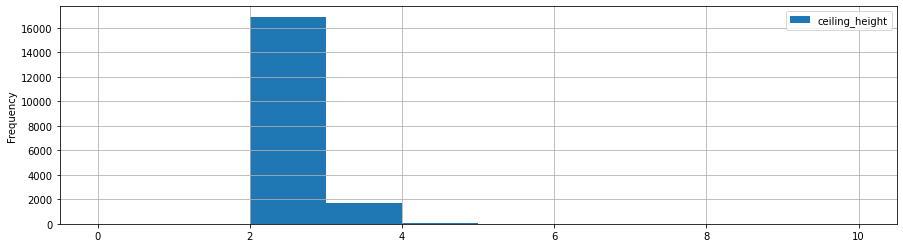

In [85]:
#высота потолков;
print(data['ceiling_height'].min())

print(data['ceiling_height'].max())



data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (15,4), range = (0,10))

Выдающееся количество недвижимости с потолками от 2 до 3 метров. Что имеет место быть. 

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Хорошие графики, можно добавить кол-во корзин к параметрам гистограммы и изменить размер у графиков (увеличить ширину)

Подписи осей на графиках и название добавят ясности и читабельности.
Это важные элементы любой визуализации. Как добавить подписи и названия, смотри [здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html) и [там](https://pyprog.pro/mpl/mpl_title.html), и
        
[тут](https://proproprogs.ru/modules/matplotlib-razmeshchaem-standartnye-tekstovye-elementy-na-grafike?ysclid=l6agtioc6f299002507)

1
32


<AxesSubplot:ylabel='Frequency'>

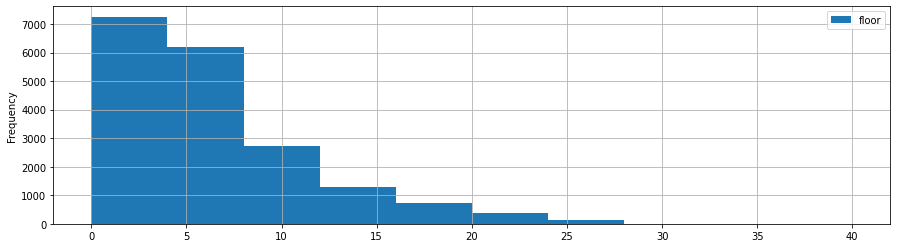

In [86]:
#этаж квартиры;
print(data['floor'].min())

print(data['floor'].max())



data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (15,4), range = (0,40))

<AxesSubplot:ylabel='Frequency'>

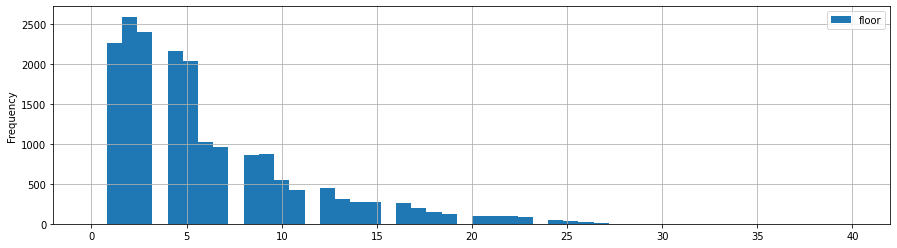

In [87]:
data.plot(y = 'floor', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,40))

<AxesSubplot:ylabel='Frequency'>

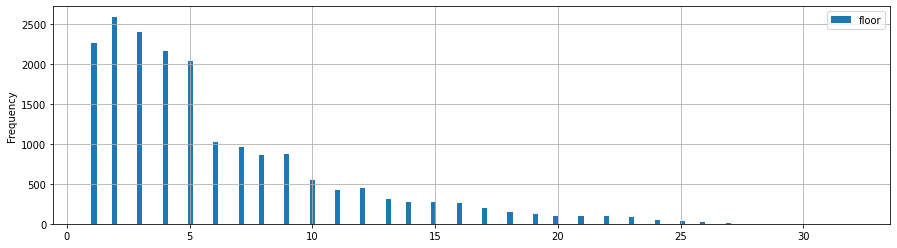

In [88]:
#больше корзин
data.plot(y = 'floor', kind = 'hist', bins = 150, grid=True, figsize = (15,4), range = (1,32))

С этажами все в порядке. Критичных выбросов нет. Распределение нормальное. 

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />          
Стоит изменить параметры отображения гистограммы (добавить корзин), сейчас трудно определить границу резкого снижения кол-ва объявлений, или на 4-ке, или на 5-ке, или на 6-ке ...

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Можно больше

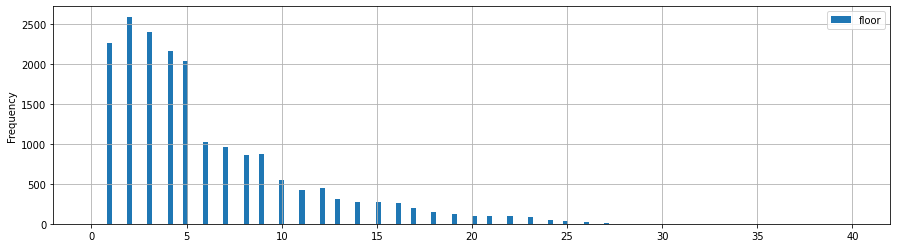

In [89]:
# check
data.plot(y = 'floor', kind = 'hist', bins = 150, grid=True, figsize = (15,4), range = (0,40));

0
60


<AxesSubplot:ylabel='Frequency'>

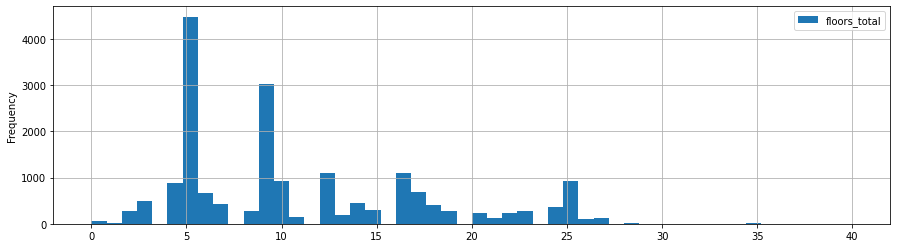

In [90]:
#общее количество этажей в доме;
print(data['floors_total'].min())

print(data['floors_total'].max())


data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,40))


Больше всего продается недвижимости на 5 этаже.  И не совсем  уверена, что знаю объекты с 60 этажами, но вдруг кто-то уже продает апартаменты в Лахта-центре. 

208.0
64857.0


<AxesSubplot:ylabel='Frequency'>

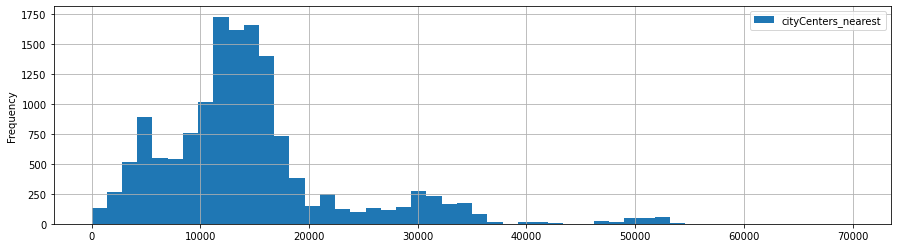

In [91]:
#расстояние до центра города в метрах;
print(data['cityCenters_nearest'].min())

print(data['cityCenters_nearest'].max())



data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,70000))

0.0
83758.0


<AxesSubplot:ylabel='Frequency'>

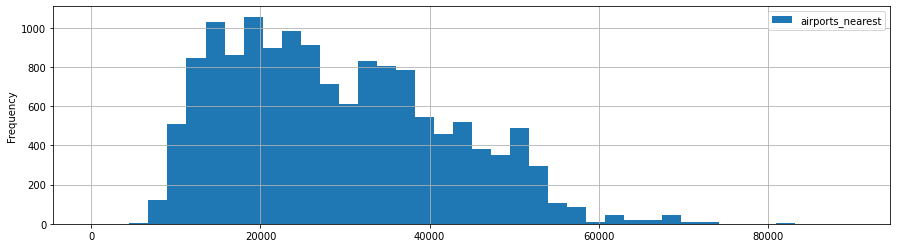

In [92]:
#расстояние до ближайшего аэропорта;
print(data['airports_nearest'].min())

print(data['airports_nearest'].max())



data.plot(y = 'airports_nearest', kind = 'hist', bins = 40,grid=True, figsize = (15,4), range = (0,90000))



Кто-то один поселился в аэропорту - минимальное значение 0. Распределение нормальное. Критичных выбросов больше нет.

1.0
3190.0


<AxesSubplot:ylabel='Frequency'>

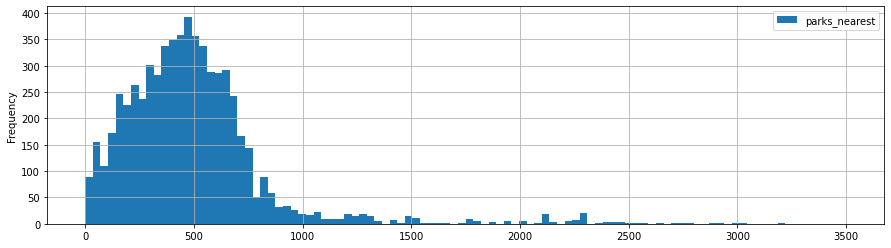

In [93]:

print(data['parks_nearest'].min())

print(data['parks_nearest'].max())



data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,3500))

Минимальное значение - 1 м2. Неоднозначно. Максимальное значение - 3190 м2. . Распределение нормальное. Критических выбросов нет.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит настроить параметр range = (0,10)
        
        data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (6,6), range = (0,10))

<AxesSubplot:ylabel='Frequency'>

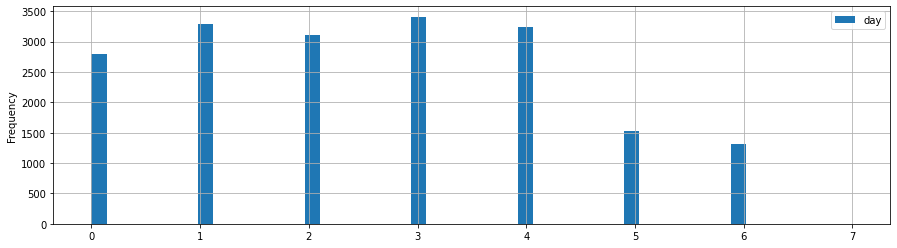

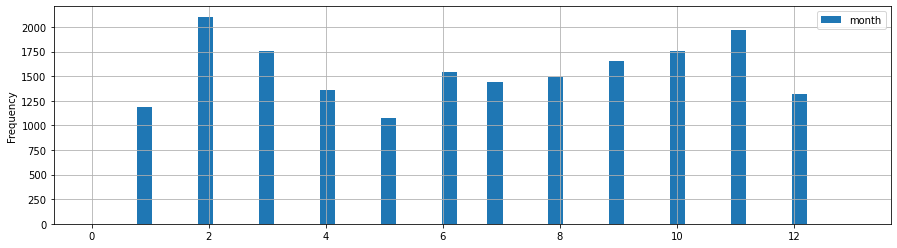

In [94]:
#день и месяц публикации объявления


data.plot(y = 'day', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,7))

data.plot(y = 'month', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,13))

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит поменять кодировку при создании колонки на день недели (у нас день месяца) и перерисовать график

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
__Интересно, почему февраль (самый короткий месяц) опережает все месяцы — ?__

# example 1

#### example 3

##### example 4

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
стоит выделять разделы проекта заголовками разного уровня, за уровень отвечает количество знаков #
    
        # example 1

        #### example 3

        ##### example 4
    
    

### 4.2 Изучите, как быстро продавались квартиры

8
729


<AxesSubplot:ylabel='Frequency'>

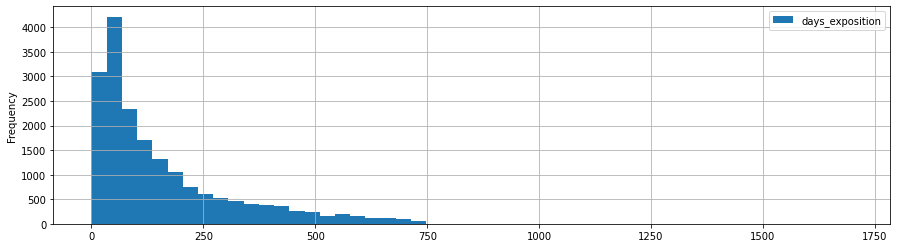

In [95]:
#Изучаю, как быстро продавались квартиры
#строю гистограмму
print(data['days_exposition'].min())

print(data['days_exposition'].max())
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (15,4), range = (0,1700))




In [96]:
#собираю информацию
data['days_exposition'].describe()

count    18669.000000
mean       156.971718
std        156.075421
min          8.000000
25%         45.000000
50%         96.000000
75%        215.000000
max        729.000000
Name: days_exposition, dtype: float64

In [97]:
#считаю выброс, влияет ли на анализ
#data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']==0]['days_exposition'].value_counts()

(array([2914., 4069., 2336., 1708., 1292., 1087.,  800.,  620.,  554.,
         451.,  414.,  386.,  352.,  330.,  236.,  218.,  157.,  190.,
         151.,  119.,  105.,   93.,   87.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([   0.,   32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,
         288.,  320.,  352.,  384.,  416.,  448.,  480.,  512.,  544.,
         576.,  608.,  640.,  672.,  704.,  736.,  768.,  800.,  832.,
         864.,  896.,  928.,  960.,  992., 1024., 1056., 1088., 1120.,
        1152., 1184., 1216., 1248., 1280., 1312., 1344., 1376., 1408.,
        1440., 1472., 1504., 1536., 1568., 1600.]),
 <BarContainer object of 50 artists>)

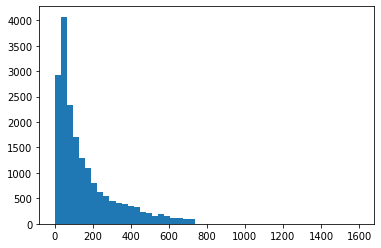

In [98]:
#разделываюсь с нулевым значением
#data.plot(y = data[data['days_exposition']!=0], kind = 'hist', bins = 50, grid=True, figsize = (6,6), range = (0,32))

#plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.hist(data[data['days_exposition'] != 0]['days_exposition'], bins = 50,  range = (0,1600))


In [99]:
#plt.hist(data[data['days_exposition'] != 0]['days_exposition'], bins = 100,  range = (40,65))


In [100]:
data['days_exposition'].describe()

count    18669.000000
mean       156.971718
std        156.075421
min          8.000000
25%         45.000000
50%         96.000000
75%        215.000000
max        729.000000
Name: days_exposition, dtype: float64

Очистив данные от выброса получила следующие  результаты:
Средним временем продажи можно считать - около 157 дней. Быстрыми можно считать продажи до 45 дней, долгими - более 200 дней. Есть и уникальные продажи - 729 дней и выше. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

Скорость продаж квартир рассчитана корректно
        
__Интересно посмотреть на изменение средней  скорости продаж по годам__

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Не исследованы моды в 'days_exposition' и как они влияют на скорость продажи, подсказка на что смотреть
        
[Условия размещения объявлений](https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

### 4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [101]:
#Изучаю, зависит ли цена от:
#общей площади, строю таблицу 
data.pivot_table(index=['last_price'], values=["total_area"], aggfunc=['sum', 'count', 'mean'])


,sum,count,mean
,total_area,total_area,total_area
last_price,,,
520000.0,30.0,1,30.000000
530000.0,29.6,1,29.600000
550000.0,198.8,5,39.760000
560000.0,112.5,3,37.500000
565000.0,45.0,1,45.000000
...,...,...,...
47700000.0,272.3,2,136.150000
48000000.0,449.5,3,149.833333


In [102]:
#посмотрю корреляцию
data['total_area'].corr(data['last_price'])

0.7786459632530975

<AxesSubplot:xlabel='total_area'>

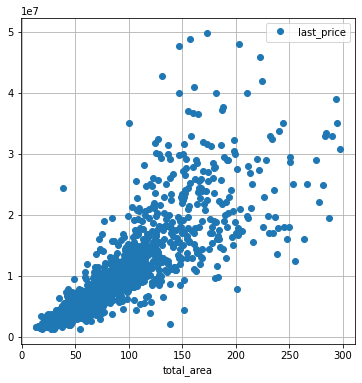

In [103]:
#строю диаграмму
#data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
#или
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(6,6))


Корреляционная зависимость цены от общей площади - есть (0.76). Чем больше площадь квартиры - тем выше цена.

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />  Можно попробовать настроить вид точечных графиков      
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)
    
Примеры расчета коэф. корреляции и не только
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?ysclid=l9ev0utyg728177057)

In [104]:
#жилой площади
#строю таблицу
data.pivot_table(index=['last_price'], values=["total_area"], aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,total_area,total_area,total_area
last_price,,,
520000.0,30.0,1,30.000000
530000.0,29.6,1,29.600000
550000.0,198.8,5,39.760000
560000.0,112.5,3,37.500000
565000.0,45.0,1,45.000000
...,...,...,...
47700000.0,272.3,2,136.150000
48000000.0,449.5,3,149.833333


In [105]:
data['last_price'].corr(data['total_area'])

0.7786459632530974

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

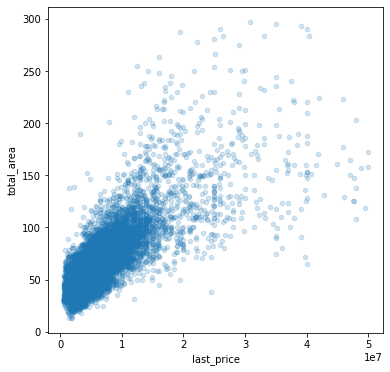

In [106]:
data.plot(x='last_price', y='total_area', kind='scatter',figsize=(6,6), alpha=0.2)

Корреляционная зависимость между ценой и общей жилой площадью есть (0,76). Чем больше площадь жилого помещения -тем выше цена. 

In [107]:
#площади кухни
data.pivot_table(index=['last_price'], values=["kitchen_area"], aggfunc=['sum', 'count', 'mean'])

,sum,count,mean
,kitchen_area,kitchen_area,kitchen_area
last_price,,,
520000.0,5.50,1,5.500000
530000.0,5.80,1,5.800000
550000.0,27.50,4,6.875000
560000.0,17.70,3,5.900000
565000.0,9.00,1,9.000000
...,...,...,...
47700000.0,25.31,2,12.655000
48000000.0,88.60,3,29.533333


In [108]:
data['last_price'].corr(data['kitchen_area'])

0.5999334109526127

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

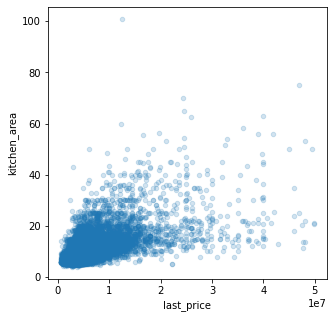

In [109]:
data.plot(x='last_price', y='kitchen_area', kind='scatter',figsize=(5,5), alpha=0.2)

Корреляционная зависимость между ценой и площадью кухни есть (0,58), но слабая. 

In [110]:
#количества комнат
data.pivot_table(index=['last_price'], values=["rooms"], aggfunc=['sum', 'count'])

,sum,count
,rooms,rooms
last_price,,
520000.0,1,1
530000.0,1,1
550000.0,8,5
560000.0,4,3
565000.0,2,1
...,...,...
47700000.0,8,2
48000000.0,13,3


In [111]:
data['last_price'].corr(data['rooms'])

0.49836667995938333

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

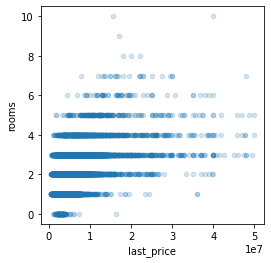

In [112]:
data.plot(x='last_price', y='rooms', kind='scatter', figsize=(4,4), alpha=0.2)

Корреляционная зависимость между количеством комнат и ценой  слабая (0,46).

In [113]:
#этажа, на котором расположена квартира (первый, последний, другой);
#сгруппирую типы этажей
#data.pivot_table(index=['last_price'], values=["floor"], aggfunc=['sum', 'count'])
data.groupby('floors_type')['last_price'].count()

floors_type
другой       13861
первый        2268
последний     2540
Name: last_price, dtype: int64

In [114]:
data['last_price'].corr(data['floor'])

0.06110587821405352

<AxesSubplot:xlabel='floors_type', ylabel='last_price'>

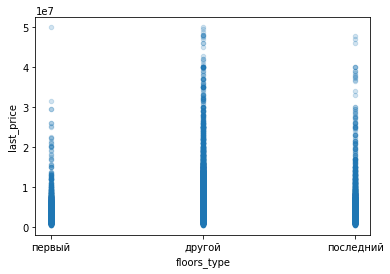

In [115]:
data.plot(x='floors_type', y='last_price', kind='scatter', alpha=0.2)

Корреляционной зависимости между типом этажа и ценой практически нет (0,03). Недвижимость продается одинаково вне зависимости от этажа. 

In [116]:
#даты размещения (день недели, месяц, год).
print(data.pivot_table(index=['last_price'], values=["day"], aggfunc=['sum', 'count']))
print(data.pivot_table(index=['last_price'], values=["month"], aggfunc=['sum', 'count']))
data.pivot_table(index=['last_price'], values=["year"], aggfunc=['sum', 'count'])

           sum count
           day   day
last_price          
520000.0     4     1
530000.0     2     1
550000.0    15     5
560000.0    11     3
565000.0     3     1
...         ..   ...
47700000.0   2     2
48000000.0   5     3
48763000.0   4     1
49500000.0   1     1
49900000.0   5     2

[2371 rows x 2 columns]
             sum count
           month month
last_price            
520000.0       9     1
530000.0       2     1
550000.0      26     5
560000.0      25     3
565000.0       9     1
...          ...   ...
47700000.0     8     2
48000000.0    17     3
48763000.0     4     1
49500000.0     1     1
49900000.0    18     2

[2371 rows x 2 columns]


,sum,count
,year,year
last_price,,
520000.0,2017,1
530000.0,2019,1
550000.0,10091,5
560000.0,6053,3
565000.0,2017,1
...,...,...
47700000.0,4032,2
48000000.0,6054,3


In [117]:
#print(data['last_price'].corr(data['day']))
#print(data['last_price'].corr(data['month']))
#print(data['last_price'].corr(data['year']))

In [118]:
print(data['day'].head(5))
print(data['month'].head(5))
#почему январь 2015 года должен стать третьим? Вроде месяц первый
#по-пайтоновски нулевой:) 

1    1
2    3
4    1
5    0
6    3
Name: day, dtype: int64
1    12
2     8
4     6
5     9
6    11
Name: month, dtype: int64


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Коэффициент корреляции рассчитывается для всех зависимостей из задания, исключая параметры - день недели и месяц — это не эффективно, т.к. это нелинейные параметры
        
чтобы они стали линейными, январь месяц 2015 года должен стать третьим и т.д., т.е. мы должны сделать перекодировку ...

In [119]:
#print(data.plot(x='last_price', y='day', kind='scatter', alpha=0.2))
#print(data.plot(x='last_price', y='month', kind='scatter', alpha=0.2))
#print(data.plot(x='last_price', y='year', kind='scatter', alpha=0.2))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


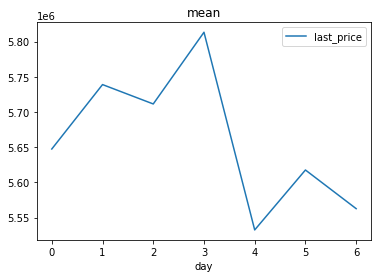

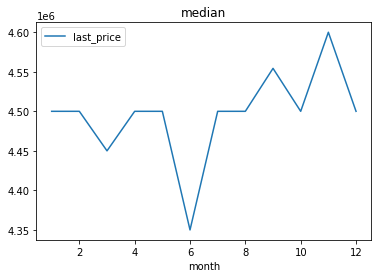

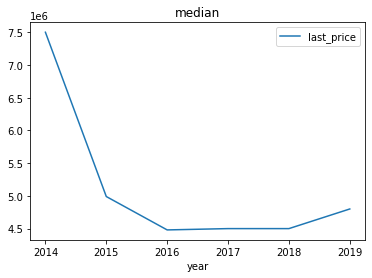

In [120]:
#меняю тактику рассчета
print(data.pivot_table(index='day',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean'));
print(data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median'));
print(data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median'));

In [121]:
total = data.pivot_table(index=['year'], values=["living_area"], aggfunc=['sum', 'count', 'mean','median'])
total

,sum,count,mean,median
,living_area,living_area,living_area,living_area
year,,,,
2014,2132.310000,41,52.007561,52.0
2015,24881.110000,672,37.025461,33.0
2016,79577.780003,2313,34.404574,30.5
2017,233441.751501,7032,33.197064,30.0
2018,193974.240003,6177,31.402661,29.0
2019,25810.710006,851,30.329859,28.9


<AxesSubplot:xlabel='year', ylabel='living_area'>

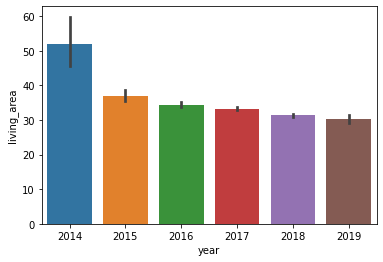

In [122]:
seaborn.barplot(x = data['year'],y= data['living_area'])

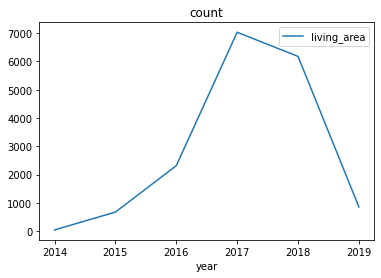

In [123]:
data.pivot_table(index='year',values='living_area',aggfunc='count').plot(y='living_area', kind='line', title='count');

Больше всего объявлений публикуется в четверг. В июне меньше всего публикаций. С 2014 по 2016 был скачок в цене недвижимости: количество объявлений увеличилось, а квадратных метров продаваемой площади стало меньше.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит поправить вывод об изменении цен по годам, необходимо учесть другие факторы, которые также изменяются с годами: площадь и кол-во объявлений о продаже (н
        арисовать два графика)
        
        С 2014 по 2016 был спад продаж недвижимости.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Если смотреть только на изменение цены по годам мы можем сделать некорректный вывод, что цены падали, а на самом деле цена это параметр на который влияет несколько других факторов, по этой причине можно посмотреть на основные из них: 
        
+ изменение кол-ва записей — принять решение о достаточности данных для анализа и сравнения (сравнивать 136 объявлений и 8454, а возможно, что они еще и из разных локаций, не совсем корректно) 
+ изменение площади, как основного параметра от которого зависит стоимость квартиры, в 2017-2018 гг. на рынок пришел массовый продавец, и средние значения упали ..., а за ней и цена
+ изменение кол-ва поданных объявлений из разных локаций, т.к. есть питерские квартиры, а есть выборгские квартиры и стоят они по разному, и в разные годы могло быть больше квартир из определенной локации
+ полнота периода для анализа, 2014 и 2019 гг. неполные, а у нас есть сезонные колебания цен, например летнее снижение цен
+ изменение доли дорогих категорий в общей выборке (средние этажи)
 
и т.д.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Стоит поменять тип у последних 4-х графиков
        
Шаг 4. Проведите исследовательский анализ данных:

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    Изучите, зависит ли цена от:
    +	общей площади;
    +	жилой площади;
    +	площади кухни;
    +	количества комнат;
    +	этажа, на котором расположена квартира (первый, последний, другой);
    +	даты размещения (день недели, месяц, год).
    
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

        
        
Советы по графикам:
        
+ зависимость параметров (от площади, удалённости от центра) оптимальнее рассматривать на точечных графиках (тип scatter),
+ динамику на линейных (это про сравнение цен за год, месяц, день недели), — стоит сгруппировать значения и рассчитать среднее или медианное значение 
+ сравнение цен на барах (для сравнение средней стоимости квартиры по трем категориям), — стоит сгруппировать значения и рассчитать среднее или медианное значение

### 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [124]:
#Выделяю населённые пункты с самой высокой и низкой стоимостью квадратного метра.
#Выборка топ-10 продаваемых местностей
city = data['locality_name'].value_counts().head(10)
city


Санкт-Петербург      12335
поселок Мурино         497
поселок Шушары         382
Всеволожск             317
Колпино                286
поселок Парголово      278
Пушкин                 273
деревня Кудрово        268
Гатчина                241
Выборг                 191
Name: locality_name, dtype: int64

In [125]:
#считаю среднюю стоимость одного квадратного метра и среднее по выборке городов
data['metres'] = data['last_price'] / data['total_area']
city_2 = data.pivot_table(index = 'locality_name', values = 'metres', aggfunc=['count', 'mean'])
city_2.columns = ['count', 'mean']
city_2 = city_2.sort_values('count', ascending = False)
city_2.head(10)

,count,mean
locality_name,,
Санкт-Петербург,12335,109519.108638
поселок Мурино,497,85583.288762
поселок Шушары,382,77874.952010
Всеволожск,317,68904.223348
Колпино,286,74528.884802
поселок Парголово,278,88809.182538
Пушкин,273,101463.359993
деревня Кудрово,268,92522.126907
Гатчина,241,67877.272516


In [126]:
def value_barh(city_2):
    try:
        (
            (city_2.sort_values('count'))
            .to_frame()
            .query('spaces > 0')
            .sort_values(by = 'spaces', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('тут должен быть красивый  график как у вас, но у меня не получилось :(')

In [127]:
value_barh(city_2)

тут должен быть красивый  график как у вас, но у меня не получилось :(


Самым дорогим все-таки считается город Санкт-Петербург, цена за м2 около 114000р.  Выборг оказывается самым дешевым вариантом из всех - 58000 р за м2. Очень далеко от города. Уже почти Финляндия. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Код можно удалять по частям и узнавать за что отвечает та или иная строка
        
        
            (df.isna().mean()*100) — расчет пропусков
            .to_frame() — превращение серии в датафрейм
            .rename(columns = {0:'space'}) — переименование полученного столбца, чтобы можно было обращаться по имени
            .query('space > 0') — фильтрация полученных строк, чтобы не выводить строки, где данные без пропусков
            .sort_values(by = 'space', ascending = True) — сортировка
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16) — отрисовка графика
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')  — установка названия

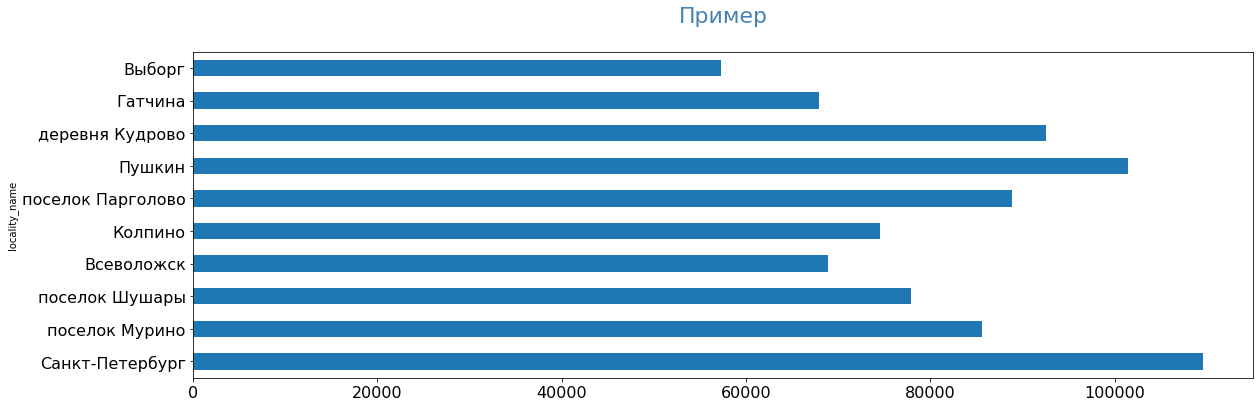

In [128]:
# check
(
    city_2['mean']
    
            
                
            .head(10)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
);    


<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Осталось пересчитать: сначала составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений, затем рассчитываем среднюю  стоимость кв. м. по населенным пунктам из полученного списка, затем строим график (бары), чтобы наглядно показать разницу в средней цене кв. метра ...
        
Шаг 4. Проведите исследовательский анализ данных:

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
        
У нас два списка отличаются
        
        Зеленогорск	115122
        Санкт-Петербург	114849
        поселок Репино	104238
        Пушкин	103125
        Сестрорецк	101757
        поселок Лисий Нос	100660
        Кудрово	100253
        деревня Мистолово	98549
        поселок Левашово	96997
        Мурино	92722


<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Недостаточно найти числа, стоит их показать красиво, удобно и наглядно, чтобы одного взгляда хватило, где самые самые, а где подешевле 📊

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[Постер поможет выбирать вид графиков](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)

### 4.5 Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.

In [129]:
#city_city = data.pivot_table(values='last_price', index='locality_name', aggfunc = 'mean').astype(int).sort_values('last_price', ascending=False)
#city_city.head(10)

In [130]:
#вычисляю среднюю цену каждого километра
#группирую по расстоянию до центра и цене, выделяю среднюю цену каждого км
data['city_center_km'] = data['city_center_km'].round(0)
data['all_metres'] = data.query(
    'locality_name == "Санкт-Петербург"').pivot_table(index = 'city_center_km',
    values = 'metres', aggfunc = 'mean', margins = True).sort_values(by = 'metres', ascending = False).round(0
    )
data['all_metres'].head(10)

1     134606.0
2     131600.0
4     125303.0
5     132805.0
6     135875.0
8     122105.0
9     111008.0
10    110690.0
12    106114.0
13    106531.0
Name: all_metres, dtype: float64

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

In [1]:
#data['last_price'].corr(data['all_metres'])

NameError: name 'data' is not defined

<AxesSubplot:>

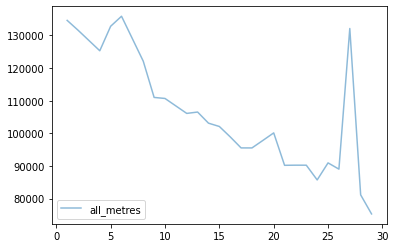

In [132]:
#Построю график
data.plot( y='all_metres', kind='line', alpha=0.5)

In [133]:
data.loc[data['all_metres'].index[27]]



total_images                              8
last_price                        7200000.0
total_area                             67.9
first_day_exposition    2017-10-26 00:00:00
rooms                                     2
ceiling_height                          2.8
floors_total                             16
living_area                            38.1
floor                                     4
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           13.4
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                    32888.0
cityCenters_nearest                 12944.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         112
price_m                         


На графике хорошо видна зависимость удаленности от цены: чем дальше от центра - тем дешевле. Существует пик на 27 км. Скорее всего, это недвижимость в элитном районе, так как цена соответсвующая.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />У нас рост цены на 27-м км., обусловлен всего одной квартирой, возможно это ошибка в данных, по этой причине мы пока отклоняем эту запись ...

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Молодец, у тебя получилось сгруппировать и построить график изменения средней цены кв. метра в зависимости от расстояния от центра
      
        
Для выполнения 5-го пункта стоит поменять параметр расчета с цены за квадрат на общую стоимость квартиры и построить линейный график
        
        
        5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.
        
        
        

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит изучить записи, которые привели к выбросу на 27-м км.
        


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Стоит посмотреть на категории квартир, которые продаются на 3-м км. и 5-ом ... и какую долю они занимают на каждом километре, чтобы объяснить пик  и провал в центре

## Общий вывод

Проведя анализ, были выяснены следующие факторы:
Средним временем продажи квартиры можно считать 150 дней. Быстрыми можно считать продажи до 45 дней, долгими - более 200 дней. Есть и уникальные продажи - 720 дней и выше. Возможно, объявление не снималось с публикации автором. 
Существуют корреляционные зависимости цены и общей площади: чем больше площадь  - тем выше цена.
Недвижимость продается одинаково вне зависимости от этажа и количества комнат, а зависимости даты публикации и цены и вовсе не наблюдается. Также на стоимость недвижимости влияет и удаленность от центра: чем дальше от центра - тем выгоднее можно приобрести апартаменты. 
Самое большое количество объявлений о продаже сделано в Санкт-Петербурге, стоимость 1м2 в котором около 114000р.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Технически вывод хороший, есть сравнения показателей, инсайты, анализ рынка недвижимости, молодец
        
Осталось перепроверить итоговый вывод после исправления всех комментариев

<div class="alert alert-success">
<font size="5"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Выполнила исследовательскую работу, молодец, показала хороший уровень навыков программирования
        
Критические ❌ комментарии
       
+ сменить тип данных
+ настроить фильтрацию редких значений в п. 2.4
+ подправить код категоризации дней
+ исправить гистограммы в п.4.1
+ подправить графики в п. 4.3 
+ подправить ТОП-10 и добавить график
+ исследовать аномалии в п.4.5
+ поправить итоговый вывод
        
        
С ними важно поработать и исправить
        
Стоит обратить внимание и на такие комментарии ⚠️
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5"><b>Жду твой проект и твои комментарии 🤝</b></font><br />
    
нумерация пунктов из брифа проекта, у тебя они могут быть другие

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />    
    
[Обработка пропусков в данных](https://loginom.ru/blog/missing)
    
<p> Доп. материал: методы группировки и расчета суммы, средних и т.д.
        
[Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html)
    
 Интересная функция в библиотеке пандаса
        
[Понимание функции transform в Pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html)
    
[Как выбрать определенные столбцы из DataFrame](https://dfedorov.spb.ru/pandas/03.%20%D0%9A%D0%B0%D0%BA%20%D0%B2%D1%8B%D0%B1%D1%80%D0%B0%D1%82%D1%8C%20%D0%BF%D0%BE%D0%B4%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D0%B8%D0%B7%20DataFrame_.html?ysclid=l9sps5lt6g576766938)
    
[How to visualise data using histograms in Pandas](https://practicaldatascience.co.uk/data-science/how-to-visualise-data-using-histograms-in-pandas)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

фух

😉

### Бонус

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в3</b></font>
<br /> 
<font size="3", color = "black">
<br />Диаграмма рассеяния

In [134]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

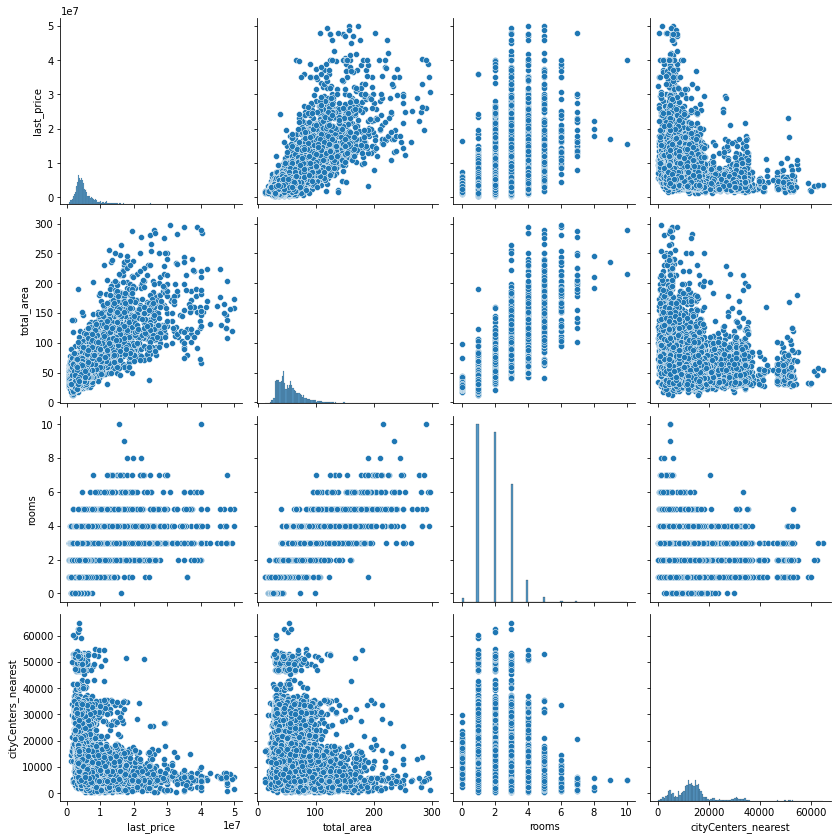

In [135]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в3</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)

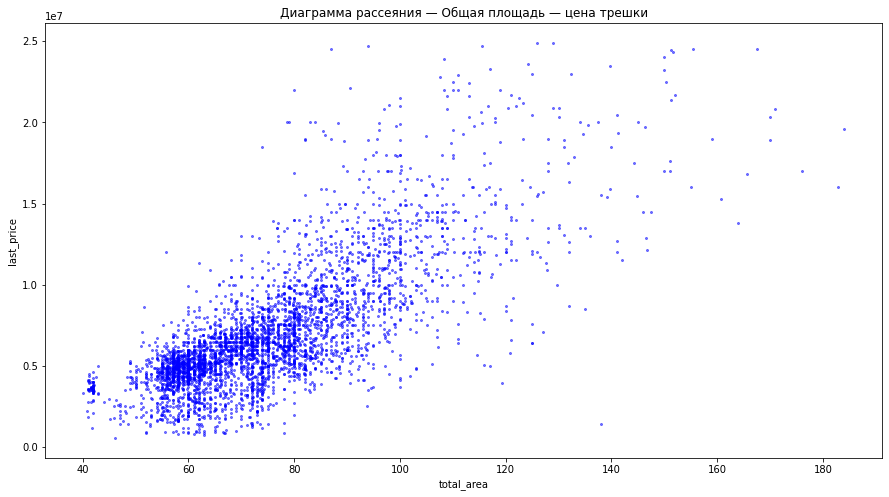

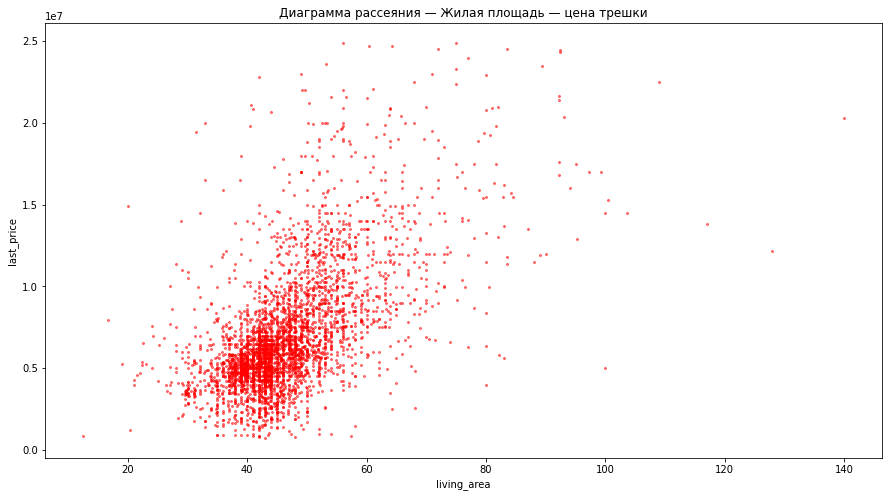

In [136]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

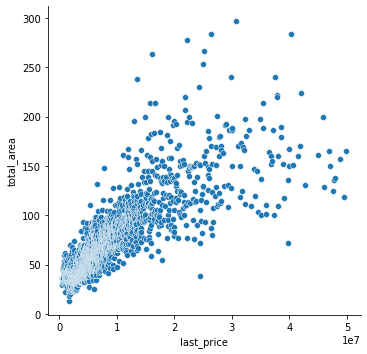

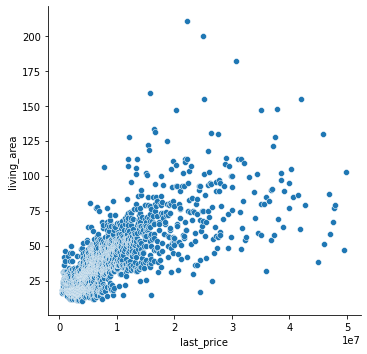

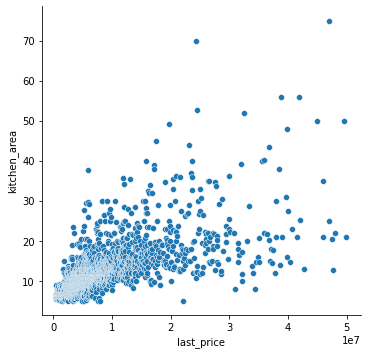

In [137]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

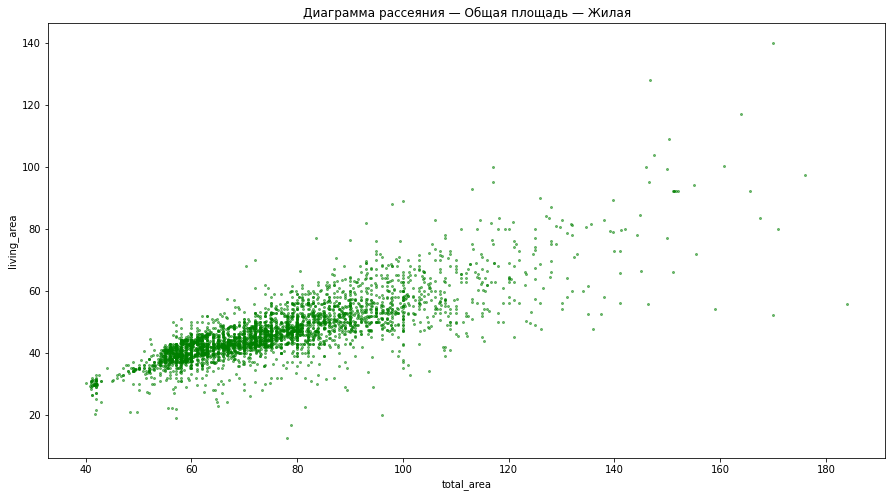

In [138]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод